In [4]:
import pandas as pd
from pathlib import Path

def clean_all_csvs(data_dir="data", output_dir="clean_data", subset=None, drop_duplicates=False):
    """
    Cleans all .csv files in the specified data directory by dropping nulls (and optionally duplicates),
    then saves the cleaned versions to the output directory with the same filenames.

    Parameters:
    - data_dir (str or Path): Folder containing raw .csv files.
    - output_dir (str or Path): Folder to save cleaned .csv files to.
    - subset (list[str], optional): Columns to check for nulls. If None, all columns are checked.
    - drop_duplicates (bool): Whether to drop duplicate rows.
    """
    data_dir = Path(data_dir)
    output_dir = Path(output_dir)

    # Create output folder if it doesn't exist
    output_dir.mkdir(parents=True, exist_ok=True)

    csv_files = list(data_dir.glob("*.csv"))

    if not csv_files:
        print("[!] No .csv files found in the data directory.")
        return

    for csv_file in csv_files:
        print(f"→ Cleaning: {csv_file.name}")

        df = pd.read_csv(csv_file)
        original_len = len(df)

        if subset:
            df = df.dropna(subset=subset)
        else:
            df = df.dropna()

        if drop_duplicates:
            df = df.drop_duplicates()

        cleaned_len = len(df)
        output_file = output_dir / csv_file.name
        df.to_csv(output_file, index=False)

        print(f"Saved cleaned file: {output_file.name} ({original_len - cleaned_len} rows dropped)")

    print(f"\n All CSVs cleaned and saved to: {output_dir}")

In [5]:
clean_all_csvs(
    data_dir="./data",
    output_dir="./clean_data",
    subset=["left_diff", "right_diff", "merged_diff"],
    drop_duplicates=True
)

→ Cleaning: sendgrid-nodejs.csv
Saved cleaned file: sendgrid-nodejs.csv (796 rows dropped)
→ Cleaning: subscriptionTracker.csv
Saved cleaned file: subscriptionTracker.csv (0 rows dropped)
→ Cleaning: react-pdf.csv
Saved cleaned file: react-pdf.csv (134 rows dropped)
→ Cleaning: zustand.csv
Saved cleaned file: zustand.csv (108 rows dropped)
→ Cleaning: zod.csv
Saved cleaned file: zod.csv (1374 rows dropped)

 All CSVs cleaned and saved to: clean_data


## Visualization

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_cleaned_data(data_dir="clean_data", max_rows=5):
    """
    Visualizes all .csv files in the given directory.
    Shows basic info, sample rows, and some light plots.
    """
    data_dir = Path(data_dir)
    csv_files = list(data_dir.glob("*.csv"))

    if not csv_files:
        print("[!] No CSV files found in cleaned data directory.")
        return

    for file in csv_files:
        print(f"\n===== 📄 File: {file.name} =====")
        df = pd.read_csv(file)

        print("🔢 Shape:", df.shape)
        print("🧠 Columns:", df.columns.tolist())

        # Show first few rows
        print(f"\n👀 Sample Rows (first {max_rows}):")
        print(df.head(max_rows))

        # Check nulls just in case
        print("\n🚨 Null Values:")
        print(df.isnull().sum())

        # Show file type counts if 'file' column exists
        if 'file' in df.columns:
            print("\n📁 File Type Distribution:")
            df['ext'] = df['file'].apply(lambda x: Path(x).suffix)
            print(df['ext'].value_counts())

            # Plot
            plt.figure(figsize=(6, 4))
            sns.countplot(data=df, x='ext', order=df['ext'].value_counts().index)
            plt.title(f"File Type Distribution in {file.name}")
            plt.xlabel("Extension")
            plt.ylabel("Count")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        # Optional: Diff length histogram
        if {'left_diff', 'right_diff', 'merged_diff'}.issubset(df.columns):
            df['left_len'] = df['left_diff'].fillna("").apply(lambda x: len(str(x).splitlines()))
            df['right_len'] = df['right_diff'].fillna("").apply(lambda x: len(str(x).splitlines()))
            df['merged_len'] = df['merged_diff'].fillna("").apply(lambda x: len(str(x).splitlines()))

            plt.figure(figsize=(8, 4))
            sns.histplot(df['left_len'], label='Left', kde=True, color='blue')
            sns.histplot(df['right_len'], label='Right', kde=True, color='orange')
            sns.histplot(df['merged_len'], label='Merged', kde=True, color='green')
            plt.title("Diff Length Distribution")
            plt.xlabel("Number of Lines")
            plt.ylabel("Frequency")
            plt.legend()
            plt.tight_layout()
            plt.show()


===== 📄 File: sendgrid-nodejs.csv =====
🔢 Shape: (56, 7)
🧠 Columns: ['repo', 'commit', 'commit_msg', 'file', 'left_diff', 'right_diff', 'merged_diff']

👀 Sample Rows (first 5):
                       repo                                    commit  \
0  sendgrid_sendgrid-nodejs  76a6f8ed46dc674cacad619e5cdb04c597c8a6cd   
1  sendgrid_sendgrid-nodejs  bef8c63079aefb217ba7383448336229c7c87f44   
2  sendgrid_sendgrid-nodejs  dba7f7bb02c62caa2d33617ca36ea09089a42eeb   
3  sendgrid_sendgrid-nodejs  61f74bd2b48581285740e5009b353e9e006afb37   
4  sendgrid_sendgrid-nodejs  fc1cb691dbf6896132a94c0802c17cdffb7e8e4b   

                                          commit_msg  \
0  Merge branch 'main' into snyk-fix-42bc93834435...   
1  Merge branch 'main' into snyk-fix-42bc93834435...   
2  Merge branch 'master' of https://github.com/di...   
3                  Merge branch 'master' into master   
4  Merge pull request #812 from valtlfelipe/fix-p...   

                                          file

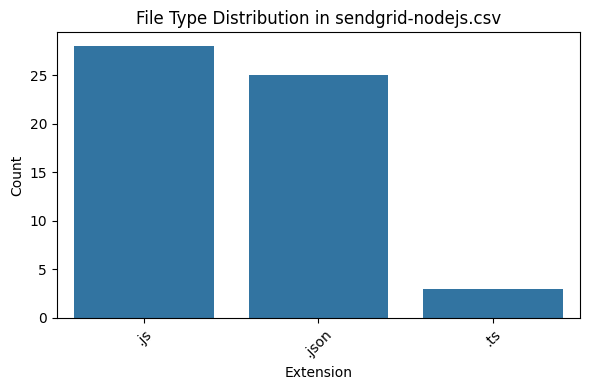

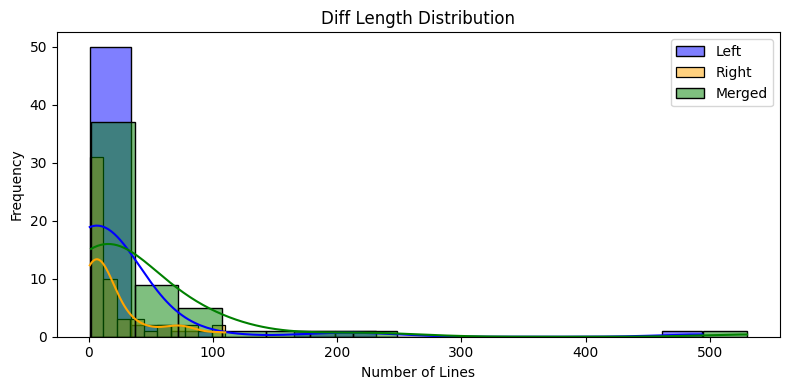


===== 📄 File: subscriptionTracker.csv =====
🔢 Shape: (1, 7)
🧠 Columns: ['repo', 'commit', 'commit_msg', 'file', 'left_diff', 'right_diff', 'merged_diff']

👀 Sample Rows (first 5):
                               repo                                    commit  \
0  bishwash-007_subscriptionTracker  c63dc037dcdba879108dc8d182cf1b6e4267c488   

                                          commit_msg    file  \
0  Merge branch 'Anurag' of https://github.com/an...  app.js   

                                           left_diff  \
0  -  await connectToDatabase();\n+  await connec...   

                                          right_diff  \
0  -import connectToDatabase from "./database/mon...   

                                         merged_diff  
0  -import connectToDatabase from "./database/mon...  

🚨 Null Values:
repo           0
commit         0
commit_msg     0
file           0
left_diff      0
right_diff     0
merged_diff    0
dtype: int64

📁 File Type Distribution:
ext
.js    1
Nam

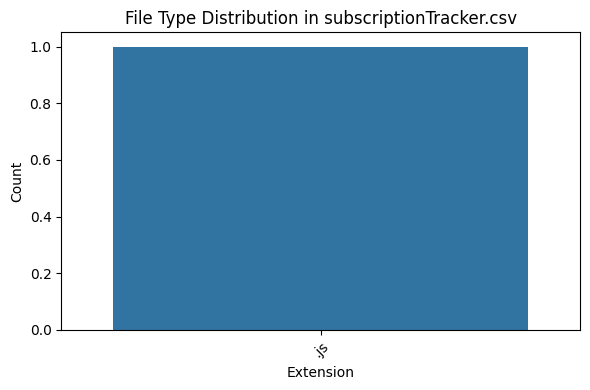

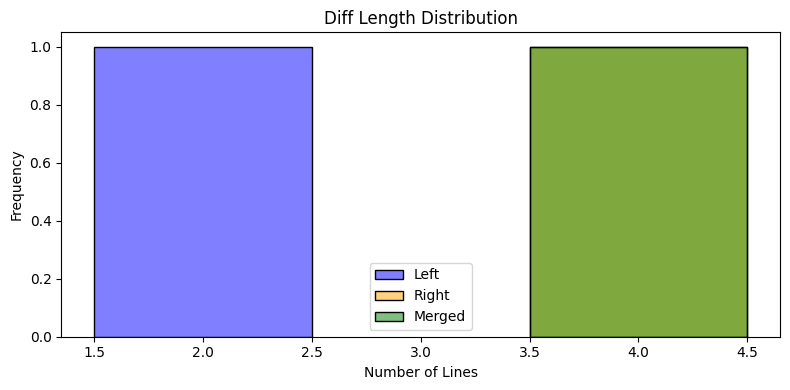


===== 📄 File: react-pdf.csv =====
🔢 Shape: (24, 7)
🧠 Columns: ['repo', 'commit', 'commit_msg', 'file', 'left_diff', 'right_diff', 'merged_diff']

👀 Sample Rows (first 5):
                  repo                                    commit  \
0  wojtekmaj_react-pdf  3cae1891847b0b3ce175523e3f2b368c043f57c2   
1  wojtekmaj_react-pdf  7e5bdcc8d59b1faa678369ee934b71862bd33c45   
2  wojtekmaj_react-pdf  7e5bdcc8d59b1faa678369ee934b71862bd33c45   
3  wojtekmaj_react-pdf  7e5bdcc8d59b1faa678369ee934b71862bd33c45   
4  wojtekmaj_react-pdf  7e5bdcc8d59b1faa678369ee934b71862bd33c45   

                             commit_msg              file  \
0  Merge branch 'file-loader' into next      package.json   
1       Merge branch 'master' into next      package.json   
2       Merge branch 'master' into next  src/Document.jsx   
3       Merge branch 'master' into next    test/yarn.lock   
4       Merge branch 'master' into next         yarn.lock   

                                           left_diff

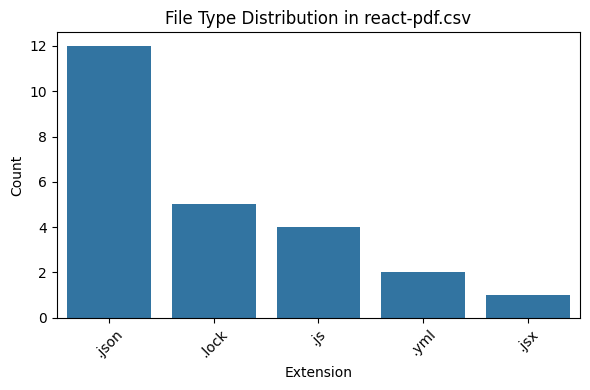

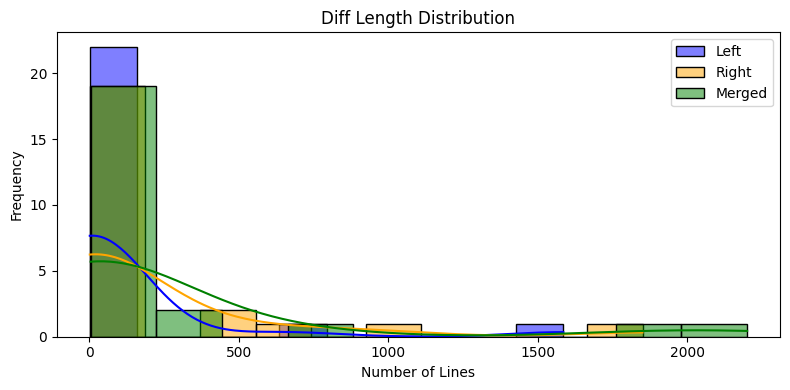


===== 📄 File: zustand.csv =====
🔢 Shape: (29, 7)
🧠 Columns: ['repo', 'commit', 'commit_msg', 'file', 'left_diff', 'right_diff', 'merged_diff']

👀 Sample Rows (first 5):
             repo                                    commit  \
0  pmndrs_zustand  a379a958b620a9b6dc81ac253eab98e06138a22f   
1  pmndrs_zustand  a379a958b620a9b6dc81ac253eab98e06138a22f   
2  pmndrs_zustand  a379a958b620a9b6dc81ac253eab98e06138a22f   
3  pmndrs_zustand  2726e1e758d235ff409e5ac25dee11b099278493   
4  pmndrs_zustand  4de1d1ff29692041e8ff994738bc806748a68fc1   

                    commit_msg                file  \
0  Merge branch 'main' into v5        package.json   
1  Merge branch 'main' into v5        src/react.ts   
2  Merge branch 'main' into v5  src/traditional.ts   
3  Merge branch 'main' into v5        package.json   
4  Merge branch 'main' into v5        package.json   

                                           left_diff  \
0  -  "version": "4.5.2",\n+  "version": "5.0.0-b...   
1  -// import 

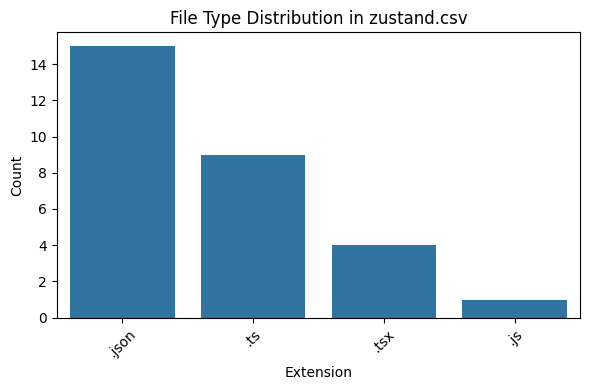

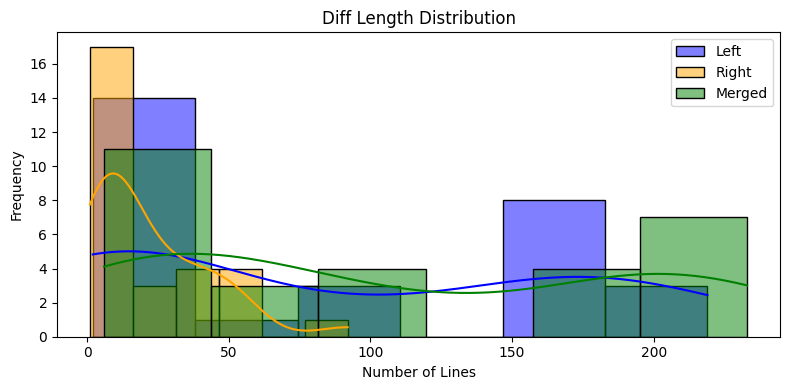


===== 📄 File: zod.csv =====
🔢 Shape: (210, 7)
🧠 Columns: ['repo', 'commit', 'commit_msg', 'file', 'left_diff', 'right_diff', 'merged_diff']

👀 Sample Rows (first 5):
             repo                                    commit  \
0  colinhacks_zod  7e86228eecbe3d7857da0305108fcca541fd3aaf   
1  colinhacks_zod  7e86228eecbe3d7857da0305108fcca541fd3aaf   
2  colinhacks_zod  d1982eaf0db82bcd510a3fabe617368a8dd393a0   
3  colinhacks_zod  84795b099e70b9862783df981a9246d241e4abfa   
4  colinhacks_zod  157f8c560a551b65148aed0b419513993badfb82   

                                          commit_msg                  file  \
0  Merge pull request #1617 from Howdju/features/...  deno/lib/ZodError.ts   
1  Merge pull request #1617 from Howdju/features/...       src/ZodError.ts   
2  Merge branch 'master' of https://github.com/co...          src/types.ts   
3  Merge pull request #1702 from p10ns11y/patch-1...          src/types.ts   
4  Merge pull request #1057 from tmcw/faster-extr...     deno/li

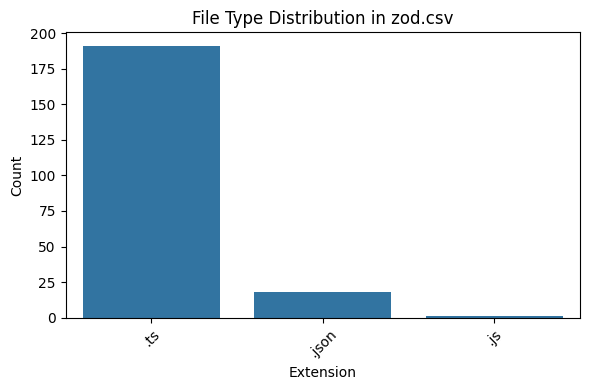

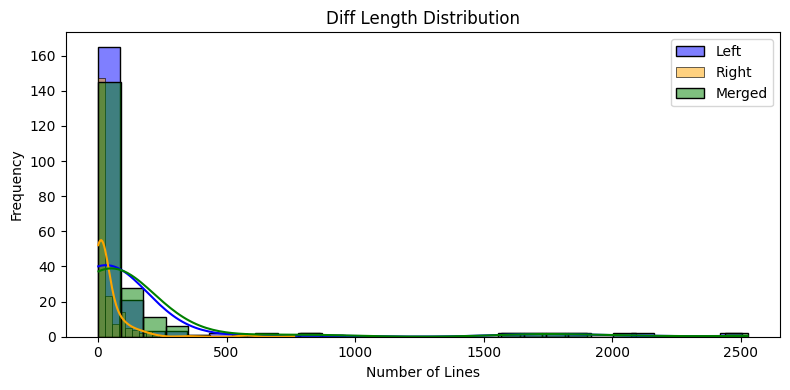

In [3]:
visualize_cleaned_data("clean_data")